# Numerical Integration (Quadrature) using Python

Sometimes you'll encounter definite integrals that cannot be solved analytically. The **`scipy`** library for Python contains numerous functions for scientific computing and data analysis, which include a few algorithms for finding the definite integrals of functions. The **`quad`** function which determines where the integral is more difficult to calculate and expends more effort there. The examples below demonstrate a few common uses of the function.

The following lines import the functions for integrating and plotting.

In [1]:
%matplotlib inline

In [1]:
from math import *
from pylab import *
from scipy.integrate import quad #.integrate import *

The integrand must be defined as a function (called **`intgrd1`** below). In the simplest case, the integrand only
depends on the variable of integration. The other arguments of the **`quad`** function are the
integrand, the lower limit, and the upper limit. It returns both the result and an estimate of the error. 

In [2]:
def intgrnd1(x):
    return cos(x)**2

print(quad(intgrnd1, 0.0, 1.0))

(0.7273243567064205, 8.074922471861484e-15)


It is easy to separate the two outputs as shown below. This is useful if you want to use the result in a calculation.

In [3]:
result, err = quad(intgrnd1, 0.0, 1.0)
print(result)

0.727324356706


Suppose you want to find the integral for several different upper limits. You could define
the integral as a function of the upper limit, then call the function for various upper limits.

In [4]:
def intgrl1(xup): # make the upper limit a variable
    return quad(intgrnd1, 0.0, xup)

print (intgrl1(2.0))
print (intgrl1(3.0))

(0.8107993761730178, 9.001681357789979e-15)
(1.4301461254502685, 1.5877811570533458e-14)


Suppose that you want to make a graph of the integral as a function of the upper limit. You
might try to make a list of upper limits, then call the **`intgrl1`** function to get a list of
results with the various upper limits. However, that will not work, because it is not a "vectorized" function which can handle a list of inputs. (Many functions like **`cos`**, which returns the cosine of the argument, are vectorized.)  
The lines below make vectorized version of the function (**`vec_intgrl1`**), which has a different name than the original function. It returns the integral for each upper limit in the list (**`xupper`**) and their uncertainty estimates.

In [5]:
vec_intgrl1 = vectorize(intgrl1)
xupper = linspace(1.0, 10.0, 50) # make a list of upper limits
print vec_intgrl1(xupper)

(array([ 0.72732436,  0.76663098,  0.78261427,  0.78539559,  0.78685786,
        0.79906004,  0.83262802,  0.89533676,  0.99107292,  1.11931618,
        1.2752087 ,  1.45020332,  1.63320403,  1.81204654,  1.97512139,
        2.11292306,  2.21931832,  2.29236456,  2.33456907,  2.35255443,
        2.35617485,  2.3572013 ,  2.3677509 ,  2.39867003,  2.45808711,
        2.55032801,  2.67533878,  2.82869293,  3.00218198,  3.18491082,
        3.36475144,  3.52996119,  3.6707497 ,  3.78058517,  3.85706598,
        3.90224112,  3.92233678,  3.92692561,  3.92764936,  3.93666551,
        3.96502508,  4.02119802,  4.10994306,  4.23167274,  4.38239834,
        4.55426214,  4.73658589,  4.91729562,  5.08453273,  5.22823631]), array([  8.07492247e-15,   8.51131370e-15,   8.68876386e-15,
         8.71964263e-15,   8.73587713e-15,   8.87134856e-15,
         9.24402794e-15,   9.94023489e-15,   1.10031198e-14,
         1.24269059e-14,   1.41576606e-14,   1.61004912e-14,
         1.81322072e-14,   2.0117

To create plot of the integral vs. the upper limit, send the results to a separate list from the errors.

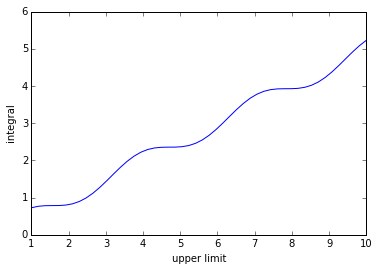

In [6]:
results, errs = vec_intgrl1(xupper)
figure()
plot(xupper, results)
xlabel('upper limit')
ylabel('integral')
show()

It is also possible to perform an integral that depends on another parameter in addition to the variable of integration. The function **`intgrnd2`** is defined as a function of the parameter **`n`**. The function **`intgrl2`** returns the integral as a funciton of the parameter, with the limits of the integration fixed. After the function is vectorized (called **`vec_intgrl2`**), the values of the integral for the each parameter in a list can be found. This makes it easy to plot the integral vs. the parameter.

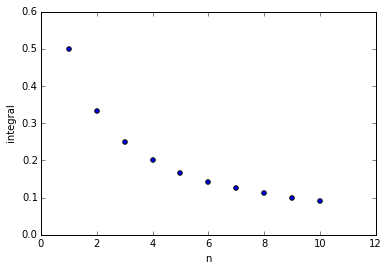

In [7]:
def intgrnd2(x, n):
    return x**n

def intgrl2(m): # make the parameter a variable
    return quad(intgrnd2, 0.0, 1.0, args=(m))

vec_intgrl2 = vectorize(intgrl2)

nlist = linspace(1, 10, 10)
results, errs = vec_intgrl2(nlist)

figure() # opens a new figure
scatter(nlist, results)
xlabel('n')
ylabel('integral')
show()

## Exercise

The electric field a distance <i>z</i> above the center of a segment of length 2<i>L</i> with uniform
charge per length λ is vertical and its magnitude is
$$ E(z) = \frac{\lambda z}{4\pi\epsilon_0} \int_{-L}^L \frac{dx^\prime}{(x^{\prime 2}+z^2)^{3/2}}$$.
<ol>
<li> If you aren't give the values of all of the variables (<i>L</i> and λ in this case), it is best
to work with quantities that don't have units. Find an expression (integral) for the unitless quantity
<i>EL</i>/<i>k</i>λ, where <i>k</i> =1/4πε<sub>0</sub>.
<li> Plot <i>EL</i>/<i>k</i>λ vs. <i>Z</i>/<i>L</i> for values of <i>Z</i>/<i>L</i> from 0.5 to 10.0. (Have the computer solve the integral numerically!
</ol>